# NB02 &ndash; Sorting features

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-definitions" data-toc-modified-id="Feature-definitions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature definitions</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Auxiliary-functions" data-toc-modified-id="Auxiliary-functions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Auxiliary functions</a></span></li></ul></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Loading" data-toc-modified-id="Loading-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loading</a></span></li><li><span><a href="#Dataframe-creation-and-simple-column-copying" data-toc-modified-id="Dataframe-creation-and-simple-column-copying-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dataframe creation and simple column copying</a></span></li><li><span><a href="#Waveform-upsampling" data-toc-modified-id="Waveform-upsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Waveform upsampling</a></span></li></ul></li><li><span><a href="#Peak/valley-related-features" data-toc-modified-id="Peak/valley-related-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Peak/valley-related features</a></span><ul class="toc-item"><li><span><a href="#Peak/valley-count-(local-maxima/minima-count)" data-toc-modified-id="Peak/valley-count-(local-maxima/minima-count)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Peak/valley count (local maxima/minima count)</a></span></li><li><span><a href="#Peak/valley-tick" data-toc-modified-id="Peak/valley-tick-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Peak/valley tick</a></span></li><li><span><a href="#Peak/valley" data-toc-modified-id="Peak/valley-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Peak/valley</a></span></li><li><span><a href="#Peak/valley-FWHM" data-toc-modified-id="Peak/valley-FWHM-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Peak/valley FWHM</a></span></li><li><span><a href="#Differences" data-toc-modified-id="Differences-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Differences</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Area-and-energy" data-toc-modified-id="Area-and-energy-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Area and energy</a></span><ul class="toc-item"><li><span><a href="#Joint-distributions" data-toc-modified-id="Joint-distributions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Joint distributions</a></span></li></ul></li><li><span><a href="#ISI" data-toc-modified-id="ISI-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ISI</a></span></li><li><span><a href="#Save-data" data-toc-modified-id="Save-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save data</a></span></li></ul></div>

## Feature definitions

**Notation:**

* Waveform at time $t$ is $w(t)$
* Waveform at sample $i$ is $w[i]$
* $k$-th waveform is $w_k$
* $T$ is the duration of waveform clips

The features are given by the table below.

|Feature|Definition|
|:---|:---:|
|Slice $i$|$w[i]$|
|Peak|$\underset{i}{\rm max}\left\{ w[i] \, : \, i > \textrm{pre-threshold} \right\}$|
|Valley|$\underset{i}{\rm min}\left\{ w[i] \, : \, i > \textrm{pre-threshold} \right\}$|
|Peak-valley|Difference between peak and valley|
|Peak FWHM|$t_b - t_a$, where $t_a < t_b$ and $w(t_a) = w(t_b) = \frac{1}{2} \underset{t}{\rm max}\left\{w(t)\right\}$|
|Valley FWHM|Defined similarly to Peak FWHM.|
|Peak/valley tick|$\underset{i}{\rm argmax}(w_i)$ and $\underset{i}{\rm argmin}(w_i)$|
|Peak/valley tick difference|$\underset{i}{\rm argmax}(w_i) - \underset{i}{\rm argmin}(w_i)$|
|Area|$\int_0^T \lVert w(t) \rVert dt$, or $\sum_i \lVert w[i] \rVert$|
|(Linear) energy|$E_L(w) = \int_0^T w(t)^2 dt$, or $\frac{1}{T} \sum_i w[i]^2$|
|Square root of linear energy|
|Non-linear energy|$E_{NL}(w) = \frac{1}{T} \sum_i \left[ w[i]^2 - w[i-1]w[i+1] \right] = E_L(w) - \frac{1}{T} \sum_i \left[ w[i-1]w[i+1] \right]$|
|ISI(prev)|Elapsed time between $w_{k-1}$ and $w_{k}$|
|ISI(next)|Elapsed time between $w_{k}$ and $w_{k+1}$|

**Notes:**
* FWHM stands for _full-width at half-maximum_.
* ISI stands for _inter-spike interval_.
* It is usefull to visualize other features as a function of timestamp, but not to use it as a sorting feature.
* Other features are available for stereotrode/tetrode elecotrodes.

**Reference:** [Offline Sorter Manual, version 4.5.0, Section 6.4 &ndash; Features Available for Sorting](https://plexon.com/wp-content/uploads/2020/01/Offline-Sorter-v4-User-Guide.pdf#G10.1105214))

## Setup

### Parameters

In [1]:
channel = 47
data_name = 'grating-v206-he1800-hd2600-kmeans_sub'

### Imports

In [2]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from collections import OrderedDict
from IPython.display import Markdown
from matplotlib import rc as mprc
from pathlib import Path
from scipy.fft import fft, ifft, fftshift, rfft, irfft
from scipy.interpolate import make_interp_spline
from scipy.integrate import trapz
from scipy.signal import argrelmin, argrelmax, resample, welch
from scipy.stats import moment
from tqdm import tqdm

mprc('figure', figsize=(10, 5))
plt.style.use('ggplot')
pd.options.display.max_columns = None
colors = ["C3", "C0", "C1", "C2", "C4", "C5", "C6", "C7"]

### Auxiliary functions

In [3]:
def plot_wfs(data, title, ylabel):
    for u, group in df.groupby('unit'):
        color = ['C3', 'C0', 'C1', 'C2', 'C4', 'C5'][u]
        unitwfs = data[group.index]

        plt.plot(time_up, unitwfs[::(len(unitwfs)//50)].T, alpha=0.5, color=color)
        plt.plot([], [], alpha=0.5, color=color, label=f'Unit {u}')
        plt.xlabel(r'Time ($\mu$s)')
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend()
        
def scatter_wfs(data_x, data_y, title, xlabel, ylabel, xscale='linear', yscale='linear'):
    for u, group in df.groupby('unit'):
        color = ['C3', 'C0', 'C1', 'C2', 'C4', 'C5'][u]
        
        plt.scatter(
            data_x.loc[group.index],
            data_y.loc[group.index],
            alpha=0.5, color=color,
        )
        plt.scatter([], [], alpha=0.5, color=color, label=f'Unit {u}')
        
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.gca().set_xscale(xscale)
        plt.gca().set_yscale(yscale)
        plt.title(title)
        plt.legend()     
        
def plot_peak_valley_features(df, title, unit, suffix=''):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    axes[0].hist(df[f'valley{suffix}'], bins=50, label='Valley')
    axes[0].hist(df[f'peak{suffix}'], bins=50, alpha=0.5, label='Peak')
    axes[0].set_xlabel(unit)
    axes[0].set_ylabel('Count')
    axes[0].legend()

    for u, group in df.groupby('unit'):
        color = ["C3", "C0", "C1", "C2", "C4", "C5"][u]
    
        axes[1].scatter(
            df.loc[group.index, f'valley{suffix}'],
            df.loc[group.index, f'peak{suffix}'],
            alpha=0.3,
            color=color,
        )
        axes[1].scatter([], [], color=color, label=f'Unit {u}')
        
    axes[1].set_xlabel(f'Valley ({unit})')
    axes[1].set_ylabel(f'Peak ({unit})')
    axes[1].legend()

    fig.suptitle(title)

## Data preparation

### Loading

In [4]:
data_path = Path(f"data/{data_name}.h5")

with h5.File(data_path, mode='r') as h5file:
    pre_threshold = h5file.attrs['NumPointsPreThr']
    sampling_rate = h5file.attrs['ADFrequency'] / 1e6
    h5_spike_data = h5file[f'spike/SPK{channel:02d}']
    spikes = np.array(h5_spike_data)
    uv_denorm = 1e3 * h5_spike_data.attrs['denorm']
    threshold = uv_denorm * h5_spike_data.attrs['threshold']
    
n_points = len(spikes)
the_units = sorted(np.unique(spikes['unit']))
n_units = len(the_units)
wf_samples = spikes.dtype['waveform'].shape[0]  # tipycally, 32
wf_samples_up = 2 * (2 * (2 * wf_samples - 1) - 1) - 1
wf_duration = wf_samples / sampling_rate
sampling_rate_up = wf_samples_up / wf_duration

Markdown(
fr"""
|Attribute|Value|
|:---|:---|
|Channel|{channel}|
|Sampling rate|{1e3 * sampling_rate} KHz|
|Spikes|{n_points}|
|Units|{the_units}|
|Waveform samples|{wf_samples}|
|Waveform upsampled to|{wf_samples_up}|
|Waveform duration|{wf_duration} $\mu$s|
|AD to $\mu$V factor|{uv_denorm:.2e}|
|Threshold|{threshold:.2f} $\mu$V|
""")


|Attribute|Value|
|:---|:---|
|Channel|47|
|Sampling rate|40.0 KHz|
|Spikes|137987|
|Units|[0, 1, 2, 3]|
|Waveform samples|32|
|Waveform upsampled to|249|
|Waveform duration|800.0 $\mu$s|
|AD to $\mu$V factor|9.54e-03|
|Threshold|-32.77 $\mu$V|


### Dataframe creation and simple column copying

In [5]:
wf_columns = [f"wf_{i}" for i in range(wf_samples)]

columns = OrderedDict(
    [
        ('timestamp', pd.Int64Dtype()),
        ('unit', pd.Int8Dtype()),
    ] + [
        ('valley', 'f8'),
        ('peak', 'f8'),
        ('valley_fwhm', 'f8'),
        ('peak_fwhm', 'f8'),
        ('valley_tick', 'f8'),
        ('peak_tick', 'f8'),
        ('valley_count', pd.Int8Dtype()),
        ('peak_count', pd.Int8Dtype()),
        ('area', 'f8'),
        ('energy', 'f8'),
        ('nl_energy', 'f8'),
        ('isi_prev', pd.Int64Dtype()),
        ('isi_next', pd.Int64Dtype()),
    ] + [
        (wf_col, 'f8')
        for wf_col in wf_columns
    ]
)
df = pd.DataFrame(
    index=np.arange(len(spikes)),
    columns=columns.keys()
).astype(columns)

df.at[:, 'unit'] = spikes['unit']
df.at[:, 'timestamp'] = ts = spikes['timestamp']
df.at[:, wf_columns] = wfs = spikes['waveform'] * uv_denorm

df

timestamp  unit  valley  peak  valley_fwhm  peak_fwhm  valley_tick  \
0            2300     2     NaN   NaN          NaN        NaN          NaN   
1            2366     3     NaN   NaN          NaN        NaN          NaN   
2            3384     2     NaN   NaN          NaN        NaN          NaN   
3            4347     3     NaN   NaN          NaN        NaN          NaN   
4            7023     3     NaN   NaN          NaN        NaN          NaN   
...           ...   ...     ...   ...          ...        ...          ...   
137982  107940880     2     NaN   NaN          NaN        NaN          NaN   
137983  107948344     3     NaN   NaN          NaN        NaN          NaN   
137984  107950873     3     NaN   NaN          NaN        NaN          NaN   
137985  107956210     3     NaN   NaN          NaN        NaN          NaN   
137986  107970063     3     NaN   NaN          NaN        NaN          NaN   

        peak_tick  valley_count  peak_count  area  energy  nl_energy  \
0             NaN          <NA>        <NA>   NaN     NaN        NaN   
1             NaN          <NA>        <NA>   NaN     NaN        NaN   
2             NaN          <NA>        <NA>   NaN     NaN        NaN   
3             NaN          <NA>        <NA>   NaN     NaN        NaN   
4             NaN          <NA>        <NA>   NaN     NaN        NaN   
...           ...           ...         ...   ...     ...        ...   
137982        NaN          <NA>        <NA>   NaN     NaN        NaN   
137983        NaN          <NA>        <NA>   NaN     NaN        NaN   
137984        NaN          <NA>        <NA>   NaN     NaN        NaN   
137985        NaN          <NA>        <NA>   NaN     NaN        NaN   
137986        NaN          <NA>        <NA>   NaN     NaN        NaN   

        isi_prev  isi_next       wf_0       wf_1       wf_2       wf_3  \
0           <NA>      <NA>  14.495850  13.322830   8.840561  13.427734   
1           <NA>      <NA>  -1.630783   1.525879   2.965927  -1.249313   
2           <NA>      <NA>   5.798340   4.158020   2.155304  -4.224777   
3           <NA>      <NA>   1.583099   8.955002   1.974106   9.717941   
4           <NA>      <NA> -15.697479 -26.578903 -25.653839 -21.657944   
...          ...       ...        ...        ...        ...        ...   
137982      <NA>      <NA>  -1.754761   5.664825   4.339218   9.069443   
137983      <NA>      <NA>   7.019043   7.905960   3.480911   2.155304   
137984      <NA>      <NA>   3.747940  -8.001328 -13.656616  -6.237030   
137985      <NA>      <NA>  -3.681183  -5.455017  -5.922318  -7.133484   
137986      <NA>      <NA> -16.164780 -12.464523 -16.183853 -19.226074   

             wf_4       wf_5       wf_6       wf_7       wf_8       wf_9  \
0       11.997223   6.399155   1.125336 -22.535324 -47.893524 -49.295425   
1      -11.606216  -8.087158 -14.705658 -26.655197 -32.844543 -30.574799   
2       -7.429123 -16.994476 -18.157959 -28.181076 -56.800842 -75.006485   
3       -8.468628  -8.182526 -28.038025 -24.585724 -35.133362 -28.905869   
4      -25.548935 -24.404526 -26.369095 -24.375916 -36.125183 -38.347244   
...           ...        ...        ...        ...        ...        ...   
137982   1.144409  -2.708435 -14.753342 -28.018951 -38.347244 -41.875839   
137983  -0.095367 -10.061264 -16.212463 -22.726059 -34.198761 -20.103455   
137984 -15.277863  -5.617142 -10.938644 -30.317307 -34.694672 -27.608871   
137985  -9.403229 -10.700226  -8.487701 -21.514893 -33.416748 -16.584396   
137986 -19.741058 -18.205643  -9.126663 -20.494461 -33.149719 -28.018951   

            wf_10      wf_11      wf_12      wf_13      wf_14      wf_15  \
0      -49.543381 -37.117004 -25.186539 -17.786026 -12.578964   3.404617   
1      -23.365021 -24.881363 -22.277832 -23.689270 -20.322800 -23.736954   
2      -74.634552 -67.596436 -50.334930 -39.157867 -27.542114 -12.874603   
3      -39.510727 -19.216537 -27.589798  -8.640289 -14.963150  -6.351471   
4      -33.540726 -31.31

### Waveform upsampling

In [6]:
ticks = np.arange(wf_samples)
ticks_up = np.linspace(0, ticks[-1], wf_samples_up)
ticks_up

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
        2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,
        5.   ,  5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.875,
        6.   ,  6.125,  6.25 ,  6.375,  6.5  ,  6.625,  6.75 ,  6.875,
        7.   ,  7.125,  7.25 ,  7.375,  7.5  ,  7.625,  7.75 ,  7.875,
        8.   ,  8.125,  8.25 ,  8.375,  8.5  ,  8.625,  8.75 ,  8.875,
        9.   ,  9.125,  9.25 ,  9.375,  9.5  ,  9.625,  9.75 ,  9.875,
       10.   , 10.125, 10.25 , 10.375, 10.5  , 10.625, 10.75 , 10.875,
       11.   , 11.125, 11.25 , 11.375, 11.5  , 11.625, 11.75 , 11.875,
       12.   , 12.125, 12.25 , 12.375, 12.5  , 12.625, 12.75 , 12.875,
       13.   , 13.125, 13.25 , 13.375, 13.5  , 13.625, 13.75 , 13.875,
      

In [7]:
time = ticks / sampling_rate
time_up = ticks_up / sampling_rate
time_up

array([  0.   ,   3.125,   6.25 ,   9.375,  12.5  ,  15.625,  18.75 ,
        21.875,  25.   ,  28.125,  31.25 ,  34.375,  37.5  ,  40.625,
        43.75 ,  46.875,  50.   ,  53.125,  56.25 ,  59.375,  62.5  ,
        65.625,  68.75 ,  71.875,  75.   ,  78.125,  81.25 ,  84.375,
        87.5  ,  90.625,  93.75 ,  96.875, 100.   , 103.125, 106.25 ,
       109.375, 112.5  , 115.625, 118.75 , 121.875, 125.   , 128.125,
       131.25 , 134.375, 137.5  , 140.625, 143.75 , 146.875, 150.   ,
       153.125, 156.25 , 159.375, 162.5  , 165.625, 168.75 , 171.875,
       175.   , 178.125, 181.25 , 184.375, 187.5  , 190.625, 193.75 ,
       196.875, 200.   , 203.125, 206.25 , 209.375, 212.5  , 215.625,
       218.75 , 221.875, 225.   , 228.125, 231.25 , 234.375, 237.5  ,
       240.625, 243.75 , 246.875, 250.   , 253.125, 256.25 , 259.375,
       262.5  , 265.625, 268.75 , 271.875, 275.   , 278.125, 281.25 ,
       284.375, 287.5  , 290.625, 293.75 , 296.875, 300.   , 303.125,
       306.25 , 309.

In [8]:
wfs_up = make_interp_spline(ticks, wfs, axis=1, k=3)(ticks_up)
wfs_up.shape

(137987, 249)

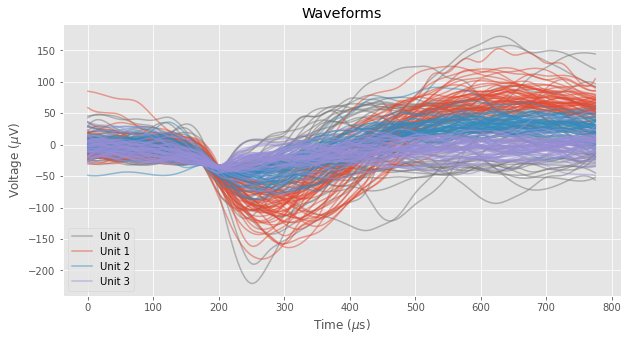

In [9]:
plot_wfs(wfs_up, 'Waveforms', r'Voltage ($\mu$V)')

## Peak/valley-related features

### Peak/valley count (local maxima/minima count)

valley_count  peak_count
0                  2           5
1                  1           0
2                  1           4
3                  1           5
4                  1           2
...              ...         ...
137982             2           3
137983             0           1
137984             0           2
137985             0           3
137986             1           1

[137987 rows x 2 columns]

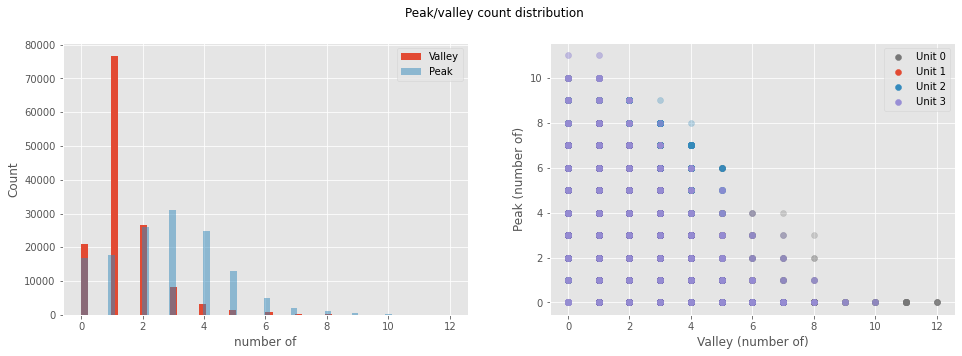

In [10]:
skip = np.argmin(np.abs(ticks_up - pre_threshold)) + 1

is_local_min = np.zeros(wfs_up.shape, dtype=bool)
is_local_max = np.zeros(wfs_up.shape, dtype=bool)
is_local_ext = np.zeros(wfs_up.shape, dtype=bool)

is_local_min[argrelmin(wfs_up, axis=1)] = True
is_local_max[argrelmax(wfs_up, axis=1)] = True
is_local_ext = is_local_min | is_local_max

is_valley = is_local_min & (wfs_up < threshold)
is_valley[:, :skip] = False

is_peak = is_local_max & (wfs_up > 0)
is_peak[:, :skip] = False

valley_count = np.sum(is_valley, axis=1)
peak_count = np.sum(is_peak, axis=1)

df['valley_count'] = valley_count
df['peak_count'] = peak_count

plot_peak_valley_features(
    df,
    title='Peak/valley count distribution',
    unit=r"number of",
    suffix='_count'
)
df[['valley_count', 'peak_count']]

### Peak/valley tick

valley_tick  peak_tick
0             8.500     16.375
1             8.250        NaN
2             9.375     18.125
3             9.875     17.125
4             8.625     24.125
...             ...        ...
137982       10.875     21.000
137983          NaN     17.125
137984          NaN     27.000
137985          NaN     24.875
137986        8.125     24.250

[137987 rows x 2 columns]

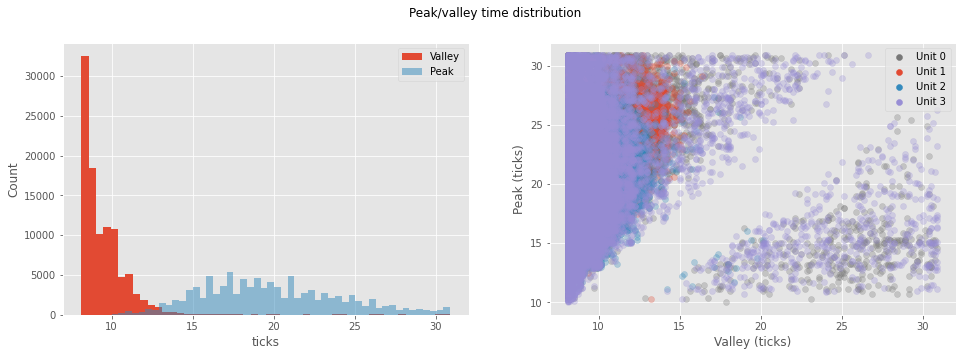

In [11]:
has_valley = np.any(is_valley, axis=1)
has_peak = np.any(is_peak, axis=1)

valley_i = np.argmax(is_valley, axis=1)
peak_i = np.argmax(is_peak, axis=1)

df.loc[has_valley, 'valley_tick'] = ticks_up[valley_i[has_valley]]
df.loc[has_peak, 'peak_tick'] = ticks_up[peak_i[has_peak]]

plot_peak_valley_features(
    df[['unit', 'valley_tick', 'peak_tick']].dropna(),
    title='Peak/valley time distribution',
    unit=r"ticks",
    suffix='_tick'
)
df[['valley_tick', 'peak_tick']]

### Peak/valley

valley       peak
0      -50.247759  26.473050
1      -33.123286        NaN
2      -76.337146  22.207655
3      -39.778670   4.639945
4      -39.072518  23.416182
...           ...        ...
137982 -53.323085  27.475357
137983        NaN   1.900854
137984        NaN   7.266998
137985        NaN   5.356585
137986 -33.336193   1.114636

[137987 rows x 2 columns]

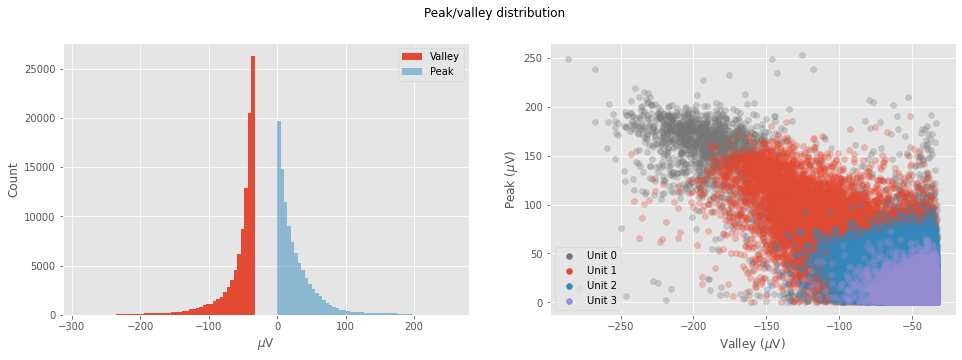

In [12]:
valley = wfs_up[np.arange(len(wfs_up)), valley_i]
peak = wfs_up[np.arange(len(wfs_up)), peak_i]

df.loc[has_valley, 'valley'] = valley[has_valley]
df.loc[has_peak, 'peak'] = peak[has_peak]

plot_peak_valley_features(
    df[['unit', 'valley', 'peak']].dropna(),
    title='Peak/valley distribution',
    unit=r'$\mu$V',
)
df[['valley', 'peak']]

### Peak/valley FWHM

valley_fwhm  peak_fwhm
0             5.000     17.500
1            11.875        NaN
2             5.625     14.125
3             6.500      8.500
4            14.500      9.000
...             ...        ...
137982        8.375     12.375
137983          NaN      4.500
137984          NaN      1.125
137985          NaN      2.375
137986       15.250      2.750

[137987 rows x 2 columns]

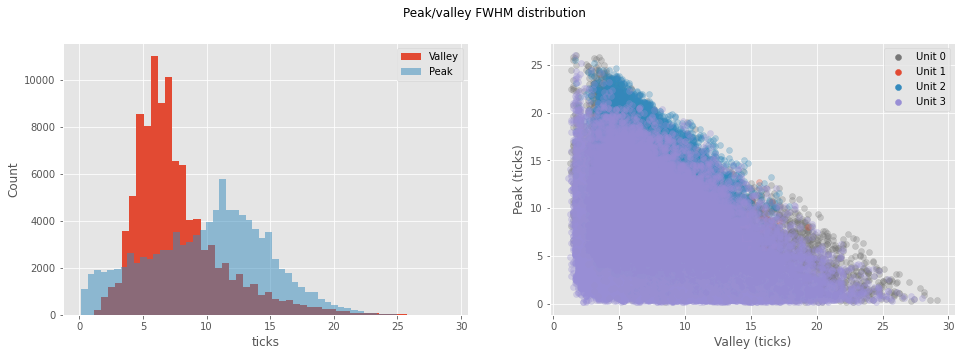

In [13]:
valley_fwhm = np.take(ticks_up, np.sum(wfs_up <= 0.5 * valley[:, np.newaxis], axis=1), mode='clip')
peak_fwhm = np.take(ticks_up, np.sum(wfs_up >= 0.5 * peak[:, np.newaxis], axis=1), mode='clip')

df.loc[has_valley, 'valley_fwhm'] = valley_fwhm[has_valley]
df.loc[has_peak, 'peak_fwhm'] = peak_fwhm[has_peak]

plot_peak_valley_features(
    df[['unit', 'valley_fwhm', 'peak_fwhm']].dropna(),
    title='Peak/valley FWHM distribution',
    unit=r"ticks",
    suffix='_fwhm'
)
df[['valley_fwhm', 'peak_fwhm']]

### Differences

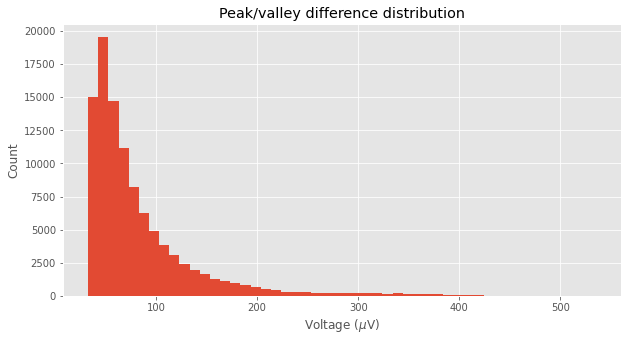

In [14]:
plt.hist(df['peak'] - df['valley'], bins=50)
plt.title('Peak/valley difference distribution')
plt.xlabel('Voltage ($\mu$V)')
plt.ylabel('Count');

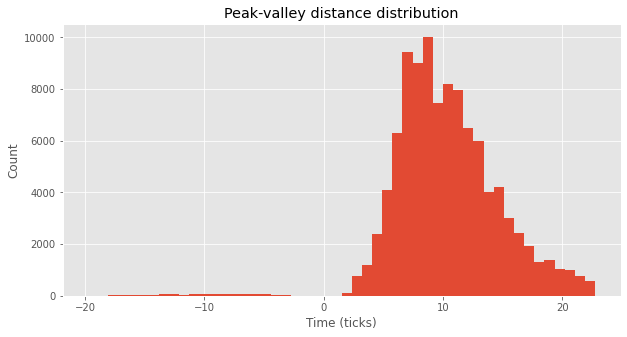

In [15]:
plt.hist(df['peak_tick'] - df['valley_tick'], bins=50)
plt.title('Peak-valley distance distribution')
plt.xlabel('Time (ticks)')
plt.ylabel('Count');

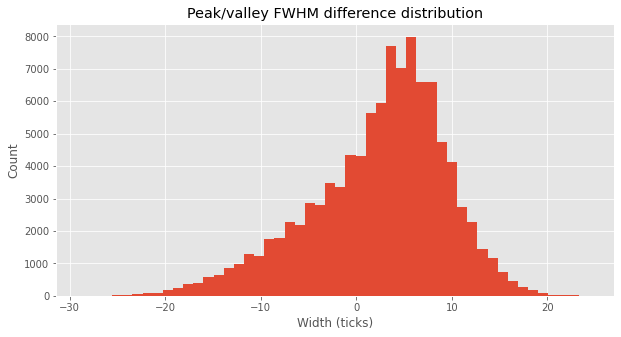

In [16]:
plt.hist(df['peak_fwhm'] - df['valley_fwhm'], bins=50)
plt.title('Peak/valley FWHM difference distribution')
plt.xlabel('Width (ticks)')
plt.ylabel('Count');

### Summary

In [17]:
df[['valley_count', 'peak_count', 'valley', 'peak', 'valley_tick', 'peak_tick', 'valley_fwhm', 'peak_fwhm']]

valley_count  peak_count     valley       peak  valley_tick  \
0                  2           5 -50.247759  26.473050        8.500   
1                  1           0 -33.123286        NaN        8.250   
2                  1           4 -76.337146  22.207655        9.375   
3                  1           5 -39.778670   4.639945        9.875   
4                  1           2 -39.072518  23.416182        8.625   
...              ...         ...        ...        ...          ...   
137982             2           3 -53.323085  27.475357       10.875   
137983             0           1        NaN   1.900854          NaN   
137984             0           2        NaN   7.266998          NaN   
137985             0           3        NaN   5.356585          NaN   
137986             1           1 -33.336193   1.114636        8.125   

        peak_tick  valley_fwhm  peak_fwhm  
0          16.375        5.000     17.500  
1             NaN       11.875        NaN  
2          18.125        5.625     14.125  
3          17.125        6.500      8.500  
4          24.125       14.500      9.000  
...           ...          ...        ...  
137982     21.000        8.375     12.375  
137983     17.125          NaN      4.500  
137984     27.000          NaN      1.125  
137985     24.875          NaN      2.375  
137986     24.250       15.250      2.750  

[137987 rows x 8 columns]

## Area and energy

In [18]:
df['area'] = np.sum(np.abs(wfs_up), axis=1) / sampling_rate
df['energy'] = np.sum(wfs_up**2, axis=1) / sampling_rate
df['nl_energy'] = df['energy'] - np.sum(wfs_up[:,:-2] * wfs_up[:,2:], axis=1) / sampling_rate

df[['area', 'energy', 'nl_energy']]

area        energy     nl_energy
0       169906.504542  5.744383e+06  56454.340740
1        90999.327525  1.823436e+06   5903.001440
2       179526.736099  7.628466e+06  37818.351285
3        76897.092961  1.583958e+06  31866.160537
4       133777.451716  3.304028e+06  25011.671110
...               ...           ...           ...
137982  171195.572767  6.322946e+06  64135.384382
137983   65657.388149  9.982509e+05  13264.169733
137984   59035.285167  9.971979e+05  10661.168731
137985   49198.695191  6.409945e+05   9408.813289
137986   93120.062116  1.783994e+06  14666.517244

[137987 rows x 3 columns]

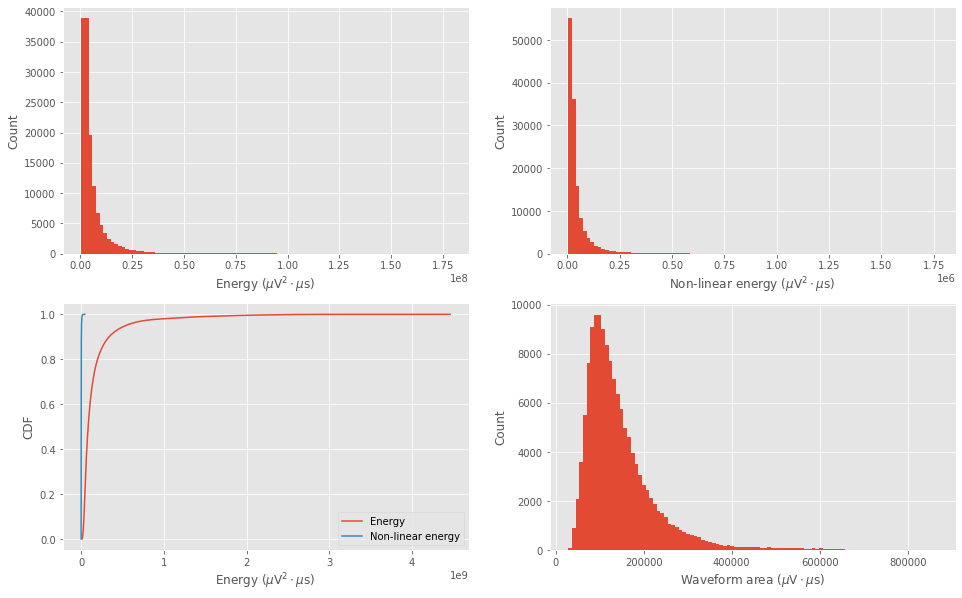

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
en_ax = axes[0][0]
nl_ax = axes[0][1]
ee_ax = axes[1][0]
ar_ax = axes[1][1]

en_ax.hist(df['energy'], bins=100)
en_ax.set_xlabel(r'Energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
en_ax.set_ylabel('Count')

nl_ax.hist(df['nl_energy'], bins=100)
nl_ax.set_xlabel(r'Non-linear energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
nl_ax.set_ylabel('Count')

ar_ax.hist(df['area'], bins=100)
ar_ax.set_xlabel(r'Waveform area ($\mu{\rm V} \cdot \mu{\rm s}$)')
ar_ax.set_ylabel('Count')

y, x = np.histogram(df['energy'], density=True, bins=1000)
ee_ax.plot(x[1:] / sampling_rate, np.cumsum(y) * (x[1] - x[0]), label='Energy')
y, x = np.histogram(df['nl_energy'], density=True, bins=1000)
ee_ax.plot(x[1:] / sampling_rate, np.cumsum(y) * (x[1] - x[0]), label='Non-linear energy')
ee_ax.set_xlabel(r'Energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
ee_ax.set_ylabel('CDF')
ee_ax.legend()

plt.show()

### Joint distributions

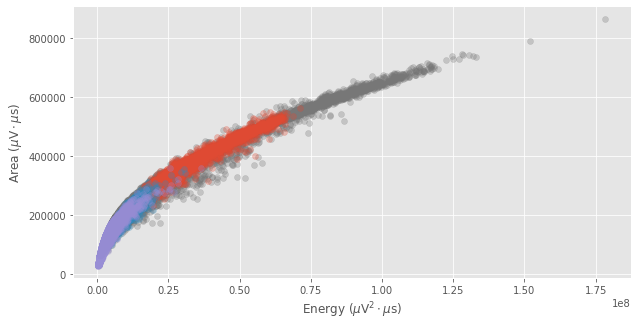

In [20]:
for unit, group in df.groupby('unit'):
    color = f"C{[3, 0, 1, 2, 4][unit]}"
    plt.scatter(group['energy'], group['area'], color=color, alpha=0.3)
    plt.xlabel(r'Energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
    plt.ylabel(r'Area ($\mu{\rm V} \cdot \mu{\rm s}$)')

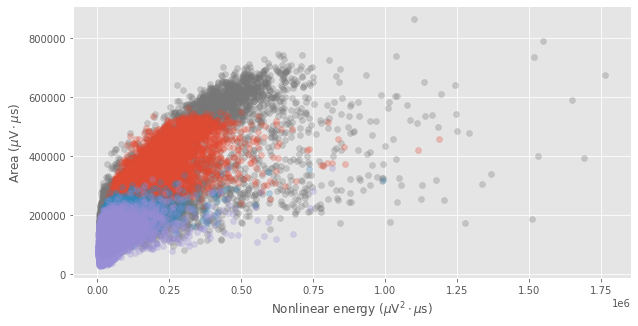

In [21]:
for unit, group in df.groupby('unit'):
    color = f"C{[3, 0, 1, 2, 4][unit]}"
    plt.scatter(group['nl_energy'], group['area'], color=color, alpha=0.3)
    plt.xlabel(r'Nonlinear energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
    plt.ylabel(r'Area ($\mu{\rm V} \cdot \mu{\rm s}$)')

## ISI

In [22]:
timestamp_isi = ts[1:] - ts[:-1]
df.loc[1:, 'isi_prev'] = df.loc[:df.index[-2], 'isi_next'] = timestamp_isi

df[['isi_prev', 'isi_next']]

isi_prev  isi_next
0           <NA>        66
1             66      1018
2           1018       963
3            963      2676
4           2676       179
...          ...       ...
137982       444      7464
137983      7464      2529
137984      2529      5337
137985      5337     13853
137986     13853      <NA>

[137987 rows x 2 columns]

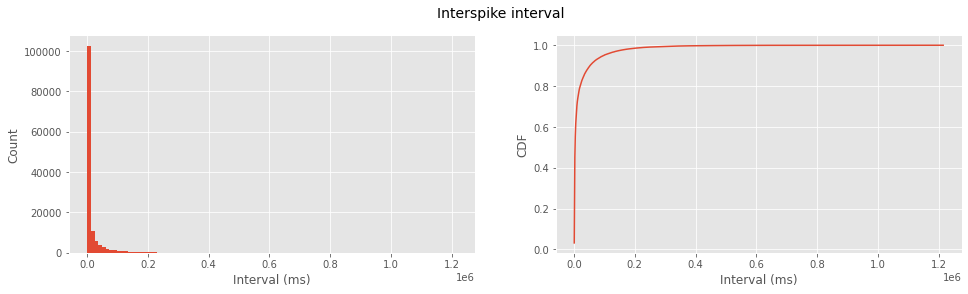

In [23]:
fig, (ax_hist, ax_cdf) = plt.subplots(1, 2, figsize=(16, 4))

mask = Ellipsis
ax_hist.hist(timestamp_isi[mask] / sampling_rate, bins=100)
ax_hist.set_xlabel('Interval (ms)')
ax_hist.set_ylabel('Count')

y, x = np.histogram(timestamp_isi, bins=10000, density=True)
ax_cdf.plot(x[1:] / sampling_rate, np.cumsum(y) * (x[1] - x[0]))
ax_cdf.set_xlabel('Interval (ms)')
ax_cdf.set_ylabel('CDF')

fig.suptitle('Interspike interval', fontsize=14)

plt.show()

## Save data

In [24]:
df['peak-valley'] = df['peak'] - df['valley']
df['peak_tick-valley_tick'] = df['peak_tick'] - df['valley_tick']

df.to_csv(f"data/{data_name}_{channel}.csv", index=False)

df

PermissionError: [Errno 13] Permission denied: 'data/grating-v206-he1800-hd2600-kmeans_sub_47.csv'